In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

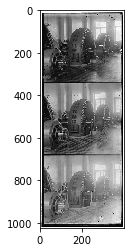

In [2]:
img = cv2.imread('s1.jpg',1)
plt.imshow(img)

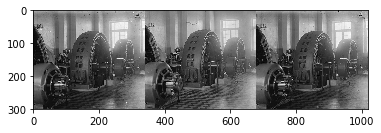

In [3]:
#Cropping the image into three using array slicing in numpy
x = img[20:320,20:360]
y = img[360:660,20:360]
z = img[700:1000,20:360]
#Displaying the three images side by side
all = cv2.hconcat([x,y,x])
plt.imshow(all)

In [4]:
b = x[:,:,0]
g = y[:,:,1]
r = z[:,:,2]

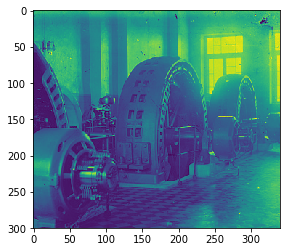

In [5]:
plt.imshow(b)

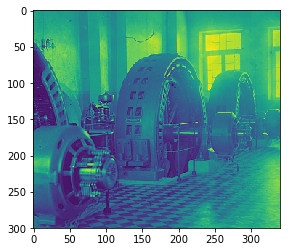

In [6]:
plt.imshow(g)

In [7]:
def sad(A,B):
    result = (abs(A-B)).sum()
    return result

In [8]:
def ssd(A,B):
    result = ((A-B)**2).sum()
    return result

In [9]:
def ncc(A,B):
    return ((A/np.linalg.norm(A)) * (B/np.linalg.norm(B))).ravel().sum()

In [10]:
sad(g,b)

9107637

In [11]:
ssd(g,b)

9234305

In [12]:
ncc(g,b)

0.9672120041220844

In [13]:
def search_space_SAD(base,img):
    config = {}
    ####### RIGHT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(0,i)],constant_values = 0)
        temp_img = temp_img[:300,i:] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = sad(base,temp_img)
        setting = 'R' + str(i)
        config[setting] = error
    ####### LEFT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(i,0)],constant_values = 0)
        temp_img = temp_img[:300,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = sad(base,temp_img)
        setting = 'L' + str(i)
        config[setting] = error
    ####### BOTTOM SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,i),(0,0)],constant_values = 0)
        temp_img = temp_img[i:,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = sad(base,temp_img)
        setting = 'B' + str(i)
        config[setting] = error
    ####### TOP SEARCH ################
    for i in range(20):
        temp_img = np.pad(img,[(i,0),(0,0)],constant_values = 0)
        temp_img = temp_img[:300,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = sad(base,temp_img)
        setting = 'A' + str(i)
        config[setting] = error
    return config

In [14]:
def search_space_SSD(base,img):
    config = {}
    ####### RIGHT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(0,i)],constant_values = 0)
        temp_img = temp_img[:300,i:] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'R' + str(i)
        config[setting] = error
    ####### LEFT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(i,0)],constant_values = 0)
        temp_img = temp_img[:300,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'L' + str(i)
        config[setting] = error
    ####### BOTTOM SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,i),(0,0)],constant_values = 0)
        temp_img = temp_img[i:,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'B' + str(i)
        config[setting] = error
    ####### TOP SEARCH ################
    for i in range(20):
        temp_img = np.pad(img,[(i,0),(0,0)],constant_values = 0)
        temp_img = temp_img[:300,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ssd(base,temp_img)
        setting = 'A' + str(i)
        config[setting] = error
    return config

In [15]:
def search_space_NCC(base,img):
    config = {}
    ####### RIGHT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(0,i)],constant_values = 0)
        temp_img = temp_img[:300,i:] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ncc(base,temp_img)
        setting = 'R' + str(i)
        config[setting] = error
    ####### LEFT SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,0),(i,0)],constant_values = 0)
        temp_img = temp_img[:300,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ncc(base,temp_img)
        setting = 'L' + str(i)
        config[setting] = error
    ####### BOTTOM SEARCH #############
    for i in range(20):
        temp_img = np.pad(img,[(0,i),(0,0)],constant_values = 0)
        temp_img = temp_img[i:,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ncc(base,temp_img)
        setting = 'B' + str(i)
        config[setting] = error
    ####### TOP SEARCH ################
    for i in range(20):
        temp_img = np.pad(img,[(i,0),(0,0)],constant_values = 0)
        temp_img = temp_img[:300,:340] #image size = 10 x 10 ------> change size
        #print(temp_img)
        error = ncc(base,temp_img)
        setting = 'A' + str(i)
        config[setting] = error
    return config

In [16]:
import time

In [17]:
start1 = time.time()
SAD = search_space_SAD(g,b)
end1 = time.time()
print(end1 - start1)

0.0277099609375


In [18]:
start2 = time.time()
SSD = search_space_SSD(g,b)
end2 = time.time()
print(end2 - start2)

0.02637791633605957


In [19]:
start3 = time.time()
NCC = search_space_NCC(g,b)
end3 = time.time()
print(end3 - start3)

0.0772089958190918


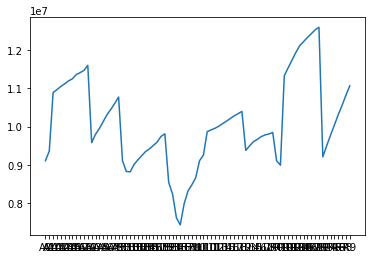

In [20]:
lists = sorted(SAD.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

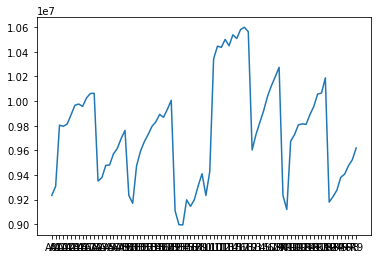

In [21]:
lists = sorted(SSD.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

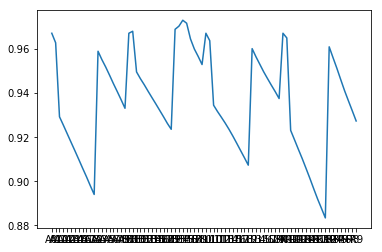

In [22]:
lists = sorted(NCC.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()